# Binary Classification Deep Learning Model for Homesite Quote Conversion Using TensorFlow Take 4
### David Lowe
### June 4, 2020

Template Credit: Adapted from a template made available by Dr. Jason Brownlee of Machine Learning Mastery. [https://machinelearningmastery.com/]

SUMMARY: The purpose of this project is to construct a predictive model using various machine learning algorithms and to document the end-to-end steps using a template. The Homesite Quote Conversion dataset is a binary classification situation where we are trying to predict one of the two possible outcomes.

INTRODUCTION: Homesite, a leading provider of homeowners' insurance, is looking for a dynamic conversion rate model that can give them indications of whether a quoted price will lead to a purchase. By using an anonymized database of information on customer and sales activity, the purpose of the exercise is to predict which customers will purchase a given quote. Accurate prediction of conversion would help Homesite better understand the impact of proposed pricing changes and maintain an ideal portfolio of customer segments. Submissions are evaluated on the area under the ROC curve between the predicted probability and the observed target.

In iteration Take1, we constructed and tuned several machine learning models using the Scikit-learn library. Furthermore, we applied the best-performing machine learning model to Kaggle's test dataset and submitted a list of predictions for evaluation.

In iteration Take2, we constructed and tuned an XGBoost machine learning model for this dataset. We also observed the best result that we could obtain using the XGBoost model with the training dataset. Furthermore, we applied the XGBoost model to Kaggle's test dataset and submitted a list of predictions to Kaggle for evaluation.

In iteration Take3, we constructed several Multilayer Perceptron (MLP) models with one hidden layer. We also observed the best result that we could obtain using the one-layer model. Furthermore, we applied the MLP model to Kaggle's test dataset and submit a list of predictions to Kaggle for evaluation.

In this Take4 iteration, we will construct several Multilayer Perceptron (MLP) models with two hidden layer. We also will observe the best result that we can obtain using the two-layer model. Furthermore, we will apply the MLP model to Kaggle's test dataset and submit a list of predictions to Kaggle for evaluation.

ANALYSIS: From iteration Take1, the baseline performance of the machine learning algorithms achieved an average ROC-AUC of 92.02%. Two algorithms (Random Forest and Gradient Boosting) produced the top accuracy metrics after the first round of modeling. After a series of tuning trials, Gradient Boosting turned in a better overall result than Random Forest. Gradient Boosting achieved a ROC-AUC metric of 96.43%. When configured with the optimized parameters, the Gradient Boosting algorithm processed the test dataset with a ROC-AUC of 96.42%. However, when we applied the Gradient Boosting model to the test dataset from Kaggle, we obtained a ROC-AUC score of 96.52%.

In iteration Take2, the performance of the XGBoost algorithm achieved an average ROC-AUC of 95.78%. After a series of tuning trials, XGBoost achieved a ROC-AUC metric of 96.48%. When configured with the optimized parameters, the XGBoost algorithm processed the test dataset with a ROC-AUC of 96.46%. However, when we applied the XGBoost model to the test dataset from Kaggle, we obtained a ROC-AUC score of 96.60%.

In iteration Take3, all one-layer models achieved a ROC-AUC performance of between 94.1% and 95.4% after 50 epochs using the test dataset. The 512-node model appears to have the highest ROC-AUC with low variance. Moreover, when we applied the single-layer neural network model to the test dataset from Kaggle, we obtained a ROC-AUC score of 95.546%.

In this Take4 iteration, all two-layer models achieved a ROC-AUC performance of between 94.1% and 95.4% after 50 epochs using the test dataset. The 512/128-node model appears to have the highest ROC-AUC with low variance. Moreover, when we applied the two-layer neural network model to the test dataset from Kaggle, we obtained a ROC-AUC score of 95.537%. We captured additional performance measurements using different model configurations.

* Two-Layer 512/64-Node MLP Model - ROC-AUC: 95.487%
* Two-Layer 512/128-Node MLP Model - ROC-AUC: 95.537%
* Two-Layer 512/192-Node MLP Model - ROC-AUC: 95.481%
* Two-Layer 512/256-Node MLP Model - ROC-AUC: 95.310%
* Two-Layer 512/320-Node MLP Model - ROC-AUC: 95.407%
* Two-Layer 512/384-Node MLP Model - ROC-AUC: 95.486%
* Two-Layer 512/448-Node MLP Model - ROC-AUC: 95.528%

CONCLUSION: For this iteration, the two-layer model with 512/128 nodes appeared to have yielded the best result. For this dataset, we should consider experimenting with more and different MLP models.

Dataset Used: Homesite Quote Conversion Data Set

Dataset ML Model: Binary classification with numerical and categorical attributes

Dataset Reference: https://www.kaggle.com/c/homesite-quote-conversion/data

One potential source of performance benchmark: https://www.kaggle.com/c/homesite-quote-conversion/leaderboard

A deep-learning modeling project generally can be broken down into five major tasks:

1. Prepare Environment
2. Load and Prepare Data
3. Define and Train Model
4. Evaluate and Optimize Model
5. Finalize Model and Make Predictions

# Task 1. Prepare Environment

In [1]:
# Retrieve CPU information from the system
ncpu = !nproc
print("The number of available CPUs is:", ncpu[0])

The number of available CPUs is: 4


In [2]:
# Retrieve GPU configuration information from Colab
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
    print('Select the Runtime → "Change runtime type" menu to enable a GPU accelerator, ')
    print('and then re-execute this cell.')
else:
    print(gpu_info)

Sat May 16 15:11:13 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.82       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P0    25W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [3]:
# Retrieve memory configuration information from Colab
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
    print('To enable a high-RAM runtime, select the Runtime → "Change runtime type"')
    print('menu, and then select High-RAM in the Runtime shape dropdown. Then, ')
    print('re-execute this cell.')
else:
    print('You are using a high-RAM runtime!')

Your runtime has 27.4 gigabytes of available RAM

You are using a high-RAM runtime!


In [0]:
# Direct Colab to use TensorFlow v2
%tensorflow_version 2.x

In [5]:
# Mount Google Drive locally for storing files
from google.colab import drive
drive.mount('/content/gdrive')
gdrivePrefix = '/content/gdrive/My Drive/Colab_Downloads/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# Set the random seed number for reproducible results
seedNum = 888

In [0]:
# Load libraries and packages
import random
random.seed(seedNum)
import numpy as np
np.random.seed(seedNum)
import tensorflow as tf
tf.random.set_seed(seedNum)
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import math
import os
import sys
import smtplib
import matplotlib.pyplot as plt
from datetime import datetime
from email.message import EmailMessage
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [8]:
# Begin the timer for the script processing
startTimeScript = datetime.now()

# Set up the verbose flag to print detailed messages for debugging (setting to True will activate)
# verbose = True
# tf.debugging.set_log_device_placement(verbose)

# Set up the number of CPU cores available for multi-thread processing
n_jobs = int(ncpu[0])
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

# Set up the flag to stop sending progress emails (setting to True will send status emails!)
notifyStatus = False

# Set the number of folds for cross validation
n_folds = 5

# Set the flag for splitting the dataset
splitDataset = True
splitPercentage = 0.25

# Set Pandas options
pd.set_option("display.max_rows", 500)

# Set various default Keras modeling parameters
default_loss = 'binary_crossentropy'
default_metrics = [tf.keras.metrics.AUC()]
default_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
default_kernel_init = tf.keras.initializers.he_uniform(seed=seedNum)
default_epoch = 50
default_batch = 32

Num GPUs Available:  1


In [0]:
# Set up the email notification function
def email_notify(msg_text):
    sender = os.environ.get('MAIL_SENDER')
    receiver = os.environ.get('MAIL_RECEIVER')
    gateway = os.environ.get('SMTP_GATEWAY')
    smtpuser = os.environ.get('SMTP_USERNAME')
    password = os.environ.get('SMTP_PASSWORD')
    if (sender is None) or (receiver is None) or (gateway is None) or (smtpuser is None) or (password is None):
        sys.exit("Incomplete email setup info. Script Processing Aborted!!!")
    msg = EmailMessage()
    msg.set_content(msg_text)
    msg['Subject'] = 'Notification from TensorFlow Binary Class Deep Learning Script'
    msg['From'] = sender
    msg['To'] = receiver
    server = smtplib.SMTP(gateway, 587)
    server.starttls()
    server.login(smtpuser, password)
    server.send_message(msg)
    server.quit()

In [0]:
# Reset the random number generators
def reset_random(x):
    random.seed(x)
    np.random.seed(x)
    tf.random.set_seed(x)

In [0]:
if (notifyStatus): email_notify("Task 1. Prepare Environment completed! "+datetime.now().strftime('%a %B %d, %Y %I:%M:%S %p'))

# Task 2. Load and Prepare Data

In [0]:
if (notifyStatus): email_notify("Task 2. Load Data has begun! "+datetime.now().strftime('%a %B %d, %Y %I:%M:%S %p'))

## 2.a) Load Dataset

In [13]:
dataset_path = 'https://dainesanalytics.com/datasets/kaggle-homesite-quote-conversion/train.csv'
Xy_original = pd.read_csv(dataset_path, sep=',')

# Take a peek at the dataframe after the import
Xy_original.head(10)

,QuoteNumber,Original_Quote_Date,QuoteConversion_Flag,Field6,Field7,Field8,Field9,Field10,Field11,Field12,CoverageField1A,CoverageField1B,CoverageField2A,CoverageField2B,CoverageField3A,CoverageField3B,CoverageField4A,CoverageField4B,CoverageField5A,CoverageField5B,CoverageField6A,CoverageField6B,CoverageField8,CoverageField9,CoverageField11A,CoverageField11B,SalesField1A,SalesField1B,SalesField2A,SalesField2B,SalesField3,SalesField4,SalesField5,SalesField6,SalesField7,SalesField8,SalesField9,SalesField10,SalesField11,SalesField12,...,GeographicField44A,GeographicField44B,GeographicField45A,GeographicField45B,GeographicField46A,GeographicField46B,GeographicField47A,GeographicField47B,GeographicField48A,GeographicField48B,GeographicField49A,GeographicField49B,GeographicField50A,GeographicField50B,GeographicField51A,GeographicField51B,GeographicField52A,GeographicField52B,GeographicField53A,GeographicField53B,GeographicField54A,GeographicField54B,GeographicField55A,GeographicField55B,GeographicField56A,GeographicField56B,GeographicField57A,GeographicField57B,GeographicField58A,GeographicField58B,GeographicField59A,GeographicField59B,GeographicField60A,GeographicField60B,GeographicField61A,GeographicField61B,GeographicField62A,GeographicField62B,GeographicField63,GeographicField64
0,1,2013-08-16,0,B,23,0.9403,0.0006,965,1.0200,N,17,23,17,23,15,22,16,22,13,22,13,23,T,D,2,1,7,18,3,8,0,5,5,24,V,48649,0,0,0,0,...,8,4,20,22,10,8,6,5,15,13,19,18,16,14,21,23,21,23,16,11,22,24,7,14,-1,17,15,17,14,18,9,9,-1,8,-1,18,-1,10,N,CA
1,2,2014-04-22,0,F,7,1.0006,0.0040,548,1.2433,N,6,8,6,8,5,7,5,8,13,22,13,23,T,E,5,9,5,14,6,18,1,5,5,11,P,26778,0,0,1,1,...,23,24,11,15,21,24,6,11,21,21,18,15,20,20,13,12,12,12,15,9,13,11,11,20,-1,9,18,21,8,7,10,10,-1,11,-1,17,-1,20,N,NJ
2,4,2014-08-25,0,F,7,1.0006,0.0040,548,1.2433,N,7,12,7,12,6,10,7,11,25,25,13,23,T,J,4,6,3,10,4,11,1,5,5,11,K,8751,0,0,2,2,...,21,22,24,25,20,22,7,13,23,23,20,19,20,20,18,20,19,21,20,19,11,8,3,3,-1,5,21,24,12,15,15,18,-1,21,-1,11,-1,8,N,NJ
3,6,2013-04-15,0,J,10,0.9769,0.0004,"1,165",1.2665,N,3,2,3,2,2,2,3,2,13,22,13,23,Y,F,15,23,8,19,14,24,0,5,5,23,V,43854,0,0,0,0,...,3,1,14,22,6,2,7,14,11,8,19,18,18,16,13,12,13,12,17,13,5,2,3,4,-1,7,14,14,14,18,6,5,-1,10,-1,9,-1,21,N,TX
4,8,2014-01-25,0,E,23,0.9472,0.0006,"1,487",1.3045,N,8,13,8,13,7,11,7,13,13,22,13,23,T,F,4,6,3,6,3,6,1,5,5,7,R,12505,1,0,0,0,...,24,25,9,11,25,25,5,3,22,22,21,21,17,15,25,25,25,25,17,13,13,11,3,4,-1,7,11,9,10,10,18,22,-1,10,-1,11,-1,12,N,IL
5,12,2014-01-18,0,E,14,0.9472,0.0006,"1,487",1.3045,N,13,20,13,20,17,23,12,20,13,22,1,6,Y,A,5,10,25,25,25,25,0,4,3,20,R,60093,1,0,0,0,...,17,19,9,12,14,16,6,6,6,3,4,2,4,2,9,7,7,5,1,1,16,17,20,24,-1,25,8,5,11,12,10,11,-1,23,-1,25,-1,14,N,IL
6,13,2013-11-01,0,J,23,0.9258,0.0004,"1,165",1.2665,N,16,23,17,23,15,22,16,22,13,22,13,23,T,G,2,2,15,24,7,20,0,5,5,7,V,15098,0,0,0,0,...,11,11,9,11,16,17,13,21,20,20,22,23,18,17,18,20,20,22,24,24,7,4,2,1,-1,7,7,3,3,2,18,22,-1,19,-1,13,-1,8,N,TX
7,14,2014-05-14,0,B,25,0.9153,0.0007,935,1.0200,N,5,8,5,8,5,6,5,7,1,2,13,23,X,D,25,25,1,1,2,3,1,5,5,11,T,55101,0,0,0,0,...,12,12,25,25,10,11,6,10,6,3,14,7,9,4,9,7,8,6,8,3,21,23,16,23,-1,20,18,22,19,23,6,5,-1,3,-1,12,-1,13,N,CA
8,18,2013-06-19,0,J,10,0.9691,0.0004,"1,165",1.2665,N,5,8,6,8,8,14,5,8,13,22,1,6,T,F,5,9,8,20,10,22,1,5,5,1,P,5476,0,1,1,1,...,8,5,11,18,15,17,8,16,11,8,21,21,21,22,4,2,5,3,21,20,7,4,4,6,-1,11,14,15,19,23,2,1,-1,3,-1,2,-1,13,N,TX
9,19,2013-06-18,0,F,11,0.9919,0.0038,564,1.1886,N,11,19,11,19,15,22,11,18,13,22,25,25,Y,E,6,12,4,13,3,8,0,1,2,17,P,59183,0,0,0,0,...,14,15,7,7,13,15,6,7,7,4,1,1,2,1,11,10,10,8,6,2,17,18,12,20,-1,22,16,19,9,9,10,11,-1,9,-1,22,-1,18,N,NJ


In [14]:
Xy_original.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260753 entries, 0 to 260752
Data columns (total 299 columns):
 #   Column                Dtype  
---  ------                -----  
 0   QuoteNumber           int64  
 1   Original_Quote_Date   object 
 2   QuoteConversion_Flag  int64  
 3   Field6                object 
 4   Field7                int64  
 5   Field8                float64
 6   Field9                float64
 7   Field10               object 
 8   Field11               float64
 9   Field12               object 
 10  CoverageField1A       int64  
 11  CoverageField1B       int64  
 12  CoverageField2A       int64  
 13  CoverageField2B       int64  
 14  CoverageField3A       int64  
 15  CoverageField3B       int64  
 16  CoverageField4A       int64  
 17  CoverageField4B       int64  
 18  CoverageField5A       int64  
 19  CoverageField5B       int64  
 20  CoverageField6A       int64  
 21  CoverageField6B       int64  
 22  CoverageField8        object 
 23  Coverage

In [15]:
null_counts = Xy_original.isnull().sum()
null_counts[null_counts > 0]

PersonalField7        113
PersonalField84    124208
PropertyField3         81
PropertyField4         63
PropertyField29    200685
PropertyField32        70
PropertyField34        70
PropertyField36       113
PropertyField38      1220
dtype: int64

In [16]:
print('Total number of NaN in the dataframe: ', Xy_original.isnull().sum().sum())

Total number of NaN in the dataframe:  326623


## 2.b) Data Cleaning

In [17]:
# Standardize the class column to the name of targetVar if required
Xy_original = Xy_original.rename(columns={'QuoteConversion_Flag': 'targetVar'})

# Dropping features due to lack of prediction value
Xy_original.drop(columns=['QuoteNumber','Original_Quote_Date'], inplace=True)
Xy_original.drop(columns=['PersonalField84','PropertyField29'], inplace=True)
Xy_original.drop(columns=['SalesField8'], inplace=True)

# Impute missing attributes with the "majority" value for each attribute
Xy_original['PersonalField7'].fillna('N', inplace=True)
Xy_original['PropertyField3'].fillna('N', inplace=True)
Xy_original['PropertyField4'].fillna('N', inplace=True)
Xy_original['PropertyField32'].fillna('Y', inplace=True)
Xy_original['PropertyField34'].fillna('Y', inplace=True)
Xy_original['PropertyField36'].fillna('N', inplace=True)
Xy_original['PropertyField38'].fillna('N', inplace=True)

# Correct non-ASCII characters in some attribute columns
Xy_original['GeographicField63'] = Xy_original['GeographicField63'].apply(lambda x: ''.join(["N" if ord(i) < 65 or ord(i) > 90 else i for i in x]))

# Correct mis-coding for some features
Xy_original.loc[(Xy_original.PersonalField16 == 'XN'), 'PersonalField16'] = 'OTHER'
Xy_original.loc[(Xy_original.PersonalField16 == 'XU'), 'PersonalField16'] = 'OTHER'
Xy_original.loc[(Xy_original.PersonalField16 == 'XY'), 'PersonalField16'] = 'OTHER'
Xy_original.loc[(Xy_original.PersonalField16 == 'ZL'), 'PersonalField16'] = 'OTHER'
Xy_original.loc[(Xy_original.PersonalField16 == 'ZO'), 'PersonalField16'] = 'OTHER'
Xy_original.loc[(Xy_original.PersonalField16 == 'ZP'), 'PersonalField16'] = 'OTHER'
Xy_original.loc[(Xy_original.PersonalField16 == 'ZQ'), 'PersonalField16'] = 'OTHER'
Xy_original.loc[(Xy_original.PersonalField16 == 'ZS'), 'PersonalField16'] = 'OTHER'
Xy_original.loc[(Xy_original.PersonalField16 == 'ZV'), 'PersonalField16'] = 'OTHER'
Xy_original.loc[(Xy_original.PersonalField17 == 'XJ'), 'PersonalField17'] = 'OTHER'
Xy_original.loc[(Xy_original.PersonalField17 == 'XO'), 'PersonalField17'] = 'OTHER'
Xy_original.loc[(Xy_original.PersonalField17 == 'XP'), 'PersonalField17'] = 'OTHER'
Xy_original.loc[(Xy_original.PersonalField17 == 'XY'), 'PersonalField17'] = 'OTHER'
Xy_original.loc[(Xy_original.PersonalField17 == 'YP'), 'PersonalField17'] = 'OTHER'
Xy_original.loc[(Xy_original.PersonalField17 == 'ZR'), 'PersonalField17'] = 'OTHER'
Xy_original.loc[(Xy_original.PersonalField18 == 'XH'), 'PersonalField18'] = 'OTHER'
Xy_original.loc[(Xy_original.PersonalField18 == 'XV'), 'PersonalField18'] = 'OTHER'
Xy_original.loc[(Xy_original.PersonalField18 == 'ZG'), 'PersonalField18'] = 'OTHER'
Xy_original.loc[(Xy_original.PersonalField18 == 'ZI'), 'PersonalField18'] = 'OTHER'
Xy_original.loc[(Xy_original.PersonalField19 == 'XL'), 'PersonalField19'] = 'OTHER'
Xy_original.loc[(Xy_original.PersonalField19 == 'YI'), 'PersonalField19'] = 'OTHER'
Xy_original.loc[(Xy_original.PersonalField19 == 'ZC'), 'PersonalField19'] = 'OTHER'
Xy_original.loc[(Xy_original.PropertyField7 == 'B'), 'PropertyField7'] = 'OTHER'

# Convert columns from one data type to another
Xy_original['Field6'] = Xy_original['Field6'].astype('category')
Xy_original['Field10'] = Xy_original['Field10'].str.replace(',','')
Xy_original['Field10'] = Xy_original['Field10'].astype('int')
Xy_original['Field12'] = Xy_original['Field12'].astype('category')
Xy_original['CoverageField8'] = Xy_original['CoverageField8'].astype('category')
Xy_original['CoverageField9'] = Xy_original['CoverageField9'].astype('category')
Xy_original['SalesField7'] = Xy_original['SalesField7'].astype('category')
Xy_original['PersonalField7'] = Xy_original['PersonalField7'].astype('category')
Xy_original['PersonalField16'] = Xy_original['PersonalField16'].astype('category')
Xy_original['PersonalField17'] = Xy_original['PersonalField17'].astype('category')
Xy_original['PersonalField18'] = Xy_original['PersonalField18'].astype('category')
Xy_original['PersonalField19'] = Xy_original['PersonalField19'].astype('category')
Xy_original['PropertyField3'] = Xy_original['PropertyField3'].astype('category')
Xy_original['PropertyField4'] = Xy_original['PropertyField4'].astype('category')
Xy_original['PropertyField5'] = Xy_original['PropertyField5'].astype('category')
Xy_original['PropertyField7'] = Xy_original['PropertyField7'].astype('category')
Xy_original['PropertyField14'] = Xy_original['PropertyField14'].astype('category')
Xy_original['PropertyField28'] = Xy_original['PropertyField28'].astype('category')
Xy_original['PropertyField30'] = Xy_original['PropertyField30'].astype('category')
Xy_original['PropertyField31'] = Xy_original['PropertyField31'].astype('category')
Xy_original['PropertyField32'] = Xy_original['PropertyField32'].astype('category')
Xy_original['PropertyField33'] = Xy_original['PropertyField33'].astype('category')
Xy_original['PropertyField34'] = Xy_original['PropertyField34'].astype('category')
Xy_original['PropertyField36'] = Xy_original['PropertyField36'].astype('category')
Xy_original['PropertyField37'] = Xy_original['PropertyField37'].astype('category')
Xy_original['PropertyField38'] = Xy_original['PropertyField38'].astype('category')
Xy_original['GeographicField63'] = Xy_original['GeographicField63'].astype('category')
Xy_original['GeographicField64'] = Xy_original['GeographicField64'].astype('category')

# Take a peek at the dataframe after cleaning
Xy_original.head(10)

,targetVar,Field6,Field7,Field8,Field9,Field10,Field11,Field12,CoverageField1A,CoverageField1B,CoverageField2A,CoverageField2B,CoverageField3A,CoverageField3B,CoverageField4A,CoverageField4B,CoverageField5A,CoverageField5B,CoverageField6A,CoverageField6B,CoverageField8,CoverageField9,CoverageField11A,CoverageField11B,SalesField1A,SalesField1B,SalesField2A,SalesField2B,SalesField3,SalesField4,SalesField5,SalesField6,SalesField7,SalesField9,SalesField10,SalesField11,SalesField12,SalesField13,SalesField14,SalesField15,...,GeographicField44A,GeographicField44B,GeographicField45A,GeographicField45B,GeographicField46A,GeographicField46B,GeographicField47A,GeographicField47B,GeographicField48A,GeographicField48B,GeographicField49A,GeographicField49B,GeographicField50A,GeographicField50B,GeographicField51A,GeographicField51B,GeographicField52A,GeographicField52B,GeographicField53A,GeographicField53B,GeographicField54A,GeographicField54B,GeographicField55A,GeographicField55B,GeographicField56A,GeographicField56B,GeographicField57A,GeographicField57B,GeographicField58A,GeographicField58B,GeographicField59A,GeographicField59B,GeographicField60A,GeographicField60B,GeographicField61A,GeographicField61B,GeographicField62A,GeographicField62B,GeographicField63,GeographicField64
0,0,B,23,0.9403,0.0006,965,1.0200,N,17,23,17,23,15,22,16,22,13,22,13,23,T,D,2,1,7,18,3,8,0,5,5,24,V,0,0,0,0,0,0,0,...,8,4,20,22,10,8,6,5,15,13,19,18,16,14,21,23,21,23,16,11,22,24,7,14,-1,17,15,17,14,18,9,9,-1,8,-1,18,-1,10,N,CA
1,0,F,7,1.0006,0.0040,548,1.2433,N,6,8,6,8,5,7,5,8,13,22,13,23,T,E,5,9,5,14,6,18,1,5,5,11,P,0,0,1,1,0,0,0,...,23,24,11,15,21,24,6,11,21,21,18,15,20,20,13,12,12,12,15,9,13,11,11,20,-1,9,18,21,8,7,10,10,-1,11,-1,17,-1,20,N,NJ
2,0,F,7,1.0006,0.0040,548,1.2433,N,7,12,7,12,6,10,7,11,25,25,13,23,T,J,4,6,3,10,4,11,1,5,5,11,K,0,0,2,2,0,0,0,...,21,22,24,25,20,22,7,13,23,23,20,19,20,20,18,20,19,21,20,19,11,8,3,3,-1,5,21,24,12,15,15,18,-1,21,-1,11,-1,8,N,NJ
3,0,J,10,0.9769,0.0004,1165,1.2665,N,3,2,3,2,2,2,3,2,13,22,13,23,Y,F,15,23,8,19,14,24,0,5,5,23,V,0,0,0,0,0,0,0,...,3,1,14,22,6,2,7,14,11,8,19,18,18,16,13,12,13,12,17,13,5,2,3,4,-1,7,14,14,14,18,6,5,-1,10,-1,9,-1,21,N,TX
4,0,E,23,0.9472,0.0006,1487,1.3045,N,8,13,8,13,7,11,7,13,13,22,13,23,T,F,4,6,3,6,3,6,1,5,5,7,R,1,0,0,0,0,0,0,...,24,25,9,11,25,25,5,3,22,22,21,21,17,15,25,25,25,25,17,13,13,11,3,4,-1,7,11,9,10,10,18,22,-1,10,-1,11,-1,12,N,IL
5,0,E,14,0.9472,0.0006,1487,1.3045,N,13,20,13,20,17,23,12,20,13,22,1,6,Y,A,5,10,25,25,25,25,0,4,3,20,R,1,0,0,0,0,0,0,...,17,19,9,12,14,16,6,6,6,3,4,2,4,2,9,7,7,5,1,1,16,17,20,24,-1,25,8,5,11,12,10,11,-1,23,-1,25,-1,14,N,IL
6,0,J,23,0.9258,0.0004,1165,1.2665,N,16,23,17,23,15,22,16,22,13,22,13,23,T,G,2,2,15,24,7,20,0,5,5,7,V,0,0,0,0,0,0,0,...,11,11,9,11,16,17,13,21,20,20,22,23,18,17,18,20,20,22,24,24,7,4,2,1,-1,7,7,3,3,2,18,22,-1,19,-1,13,-1,8,N,TX
7,0,B,25,0.9153,0.0007,935,1.0200,N,5,8,5,8,5,6,5,7,1,2,13,23,X,D,25,25,1,1,2,3,1,5,5,11,T,0,0,0,0,0,0,0,...,12,12,25,25,10,11,6,10,6,3,14,7,9,4,9,7,8,6,8,3,21,23,16,23,-1,20,18,22,19,23,6,5,-1,3,-1,12,-1,13,N,CA
8,0,J,10,0.9691,0.0004,1165,1.2665,N,5,8,6,8,8,14,5,8,13,22,1,6,T,F,5,9,8,20,10,22,1,5,5,1,P,0,1,1,1,0,0,0,...,8,5,11,18,15,17,8,16,11,8,21,21,21,22,4,2,5,3,21,20,7,4,4,6,-1,11,14,15,19,23,2,1,-1,3,-1,2,-1,13,N,TX
9,0,F,11,0.9919,0.0038,564,1.1886,N,11,19,11,19,15,22,11,18,13,22,25,25,Y,E,6,12,4,13,3,8,0,1,2,17,P,0,0,0,0,0,0,0,...,14,15,7,7,13,15,6,7,7,4,1,1,2,1,11,10,10,8,6,2,17,18,12,20,-1,22,16,19,9,9,10,11,-1,9,-1,22,-1,18,N,NJ


In [18]:
Xy_original.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260753 entries, 0 to 260752
Data columns (total 294 columns):
 #   Column              Dtype   
---  ------              -----   
 0   targetVar           int64   
 1   Field6              category
 2   Field7              int64   
 3   Field8              float64 
 4   Field9              float64 
 5   Field10             int64   
 6   Field11             float64 
 7   Field12             category
 8   CoverageField1A     int64   
 9   CoverageField1B     int64   
 10  CoverageField2A     int64   
 11  CoverageField2B     int64   
 12  CoverageField3A     int64   
 13  CoverageField3B     int64   
 14  CoverageField4A     int64   
 15  CoverageField4B     int64   
 16  CoverageField5A     int64   
 17  CoverageField5B     int64   
 18  CoverageField6A     int64   
 19  CoverageField6B     int64   
 20  CoverageField8      category
 21  CoverageField9      category
 22  CoverageField11A    int64   
 23  CoverageField11B    int64   
 24 

In [19]:
null_counts = Xy_original.isnull().sum()
null_counts[null_counts > 0]

Series([], dtype: int64)

In [20]:
print('Total number of NaN in the dataframe: ', Xy_original.isnull().sum().sum())

Total number of NaN in the dataframe:  0


## 2.c) Feature Scaling and Pre-processing

In [0]:
# Use variable totCol to hold the number of columns in the dataframe
totCol = len(Xy_original.columns)

# Set up variable totAttr for the total number of attribute columns
totAttr = totCol-1

# targetCol variable indicates the column location of the target/class variable
# If the first column, set targetCol to 1. If the last column, set targetCol to totCol
# If (targetCol <> 1) and (targetCol <> totCol), be aware when slicing up the dataframes for visualization
targetCol = 1

In [22]:
# We create attribute-only and target-only datasets (X_original and y_original)
# for various visualization and cleaning/transformation operations

if targetCol == totCol:
    X_original = Xy_original.iloc[:,0:totAttr]
    y_original = Xy_original.iloc[:,totAttr]
else:
    X_original = Xy_original.iloc[:,1:totCol]
    y_original = Xy_original.iloc[:,0]

print("Xy_original.shape: {} X_original.shape: {} y_original.shape: {}".format(Xy_original.shape, X_original.shape, y_original.shape))

Xy_original.shape: (260753, 294) X_original.shape: (260753, 293) y_original.shape: (260753,)


In [0]:
# Set up the number of row and columns for visualization display. dispRow * dispCol should be >= totAttr
dispCol = 4
if totAttr % dispCol == 0 :
    dispRow = totAttr // dispCol
else :
    dispRow = (totAttr // dispCol) + 1
    
# Set figure width to display the data visualization plots
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = dispCol*4
fig_size[1] = dispRow*4
plt.rcParams["figure.figsize"] = fig_size

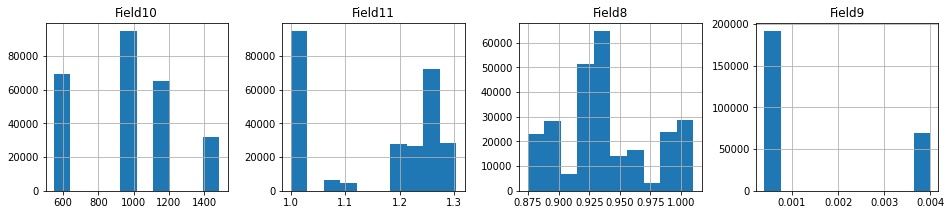

In [24]:
# Histograms for each attribute before pre-processing
columns_to_scale = ['Field8','Field9','Field10','Field11']
X_original[columns_to_scale].hist(layout=(dispRow,dispCol))
plt.show()

In [25]:
# Apply feature scaling and transformation
scaler = preprocessing.MinMaxScaler()
X_original[columns_to_scale] = scaler.fit_transform(X_original[columns_to_scale])

print(X_original.head(-10))

       Field6  Field7  ...  GeographicField63  GeographicField64
0           B      23  ...                  N                 CA
1           F       7  ...                  N                 NJ
2           F       7  ...                  N                 NJ
3           J      10  ...                  N                 TX
4           E      23  ...                  N                 IL
...       ...     ...  ...                ...                ...
260738      E      23  ...                  N                 IL
260739      B      25  ...                  N                 CA
260740      J      10  ...                  N                 TX
260741      F      23  ...                  N                 NJ
260742      B      24  ...                  N                 CA

[260743 rows x 293 columns]


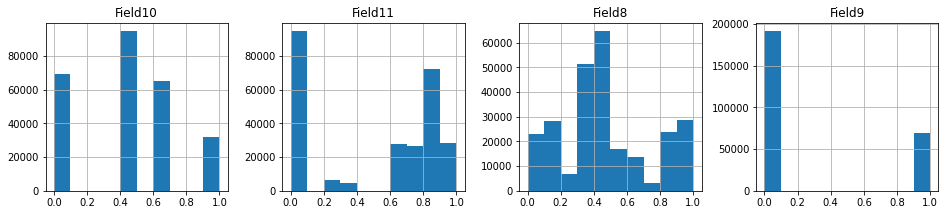

In [26]:
# Histograms for each attribute after pre-processing
X_original[columns_to_scale].hist(layout=(dispRow,dispCol))
plt.show()

## 2.d) Splitting Data into Training and Test Sets

In [27]:
# Perform one-hot-encoding before splitting into trainig and test
X_original = pd.get_dummies(X_original)
print(X_original.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260753 entries, 0 to 260752
Columns: 580 entries, Field7 to GeographicField64_TX
dtypes: float64(5), int64(262), uint8(313)
memory usage: 609.0 MB
None


In [28]:
# Encode class values as integers and perform one-hot-encoding
y_encoded = y_original.to_numpy()
# encoder = preprocessing.LabelEncoder()
# encoder.fit(y_original)
# y_encoded = encoder.transform(y_original)
print(y_encoded)

[0 0 0 ... 0 0 0]


In [29]:
# Split the data further into training and test datasets
X_encoded = X_original.to_numpy()
if (splitDataset):
    X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=splitPercentage, 
                                                        stratify=y_encoded, random_state=seedNum)
else:
    X_train, y_train = X_encoded, y_encoded
    X_test, y_test = X_encoded, y_encoded
print("X_train.shape: {} X_train.type: {}".format(X_train.shape, type(X_train)))
print("y_train.shape: {} y_train.type: {}".format(y_train.shape, type(y_train)))
print("X_test.shape: {} X_test.type: {}".format(X_test.shape, type(X_test)))
print("y_test.shape: {} y_test.type: {}".format(y_test.shape, type(y_test)))

X_train.shape: (195564, 580) X_train.type: <class 'numpy.ndarray'>
y_train.shape: (195564,) y_train.type: <class 'numpy.ndarray'>
X_test.shape: (65189, 580) X_test.type: <class 'numpy.ndarray'>
y_test.shape: (65189,) y_test.type: <class 'numpy.ndarray'>


In [0]:
if (notifyStatus): email_notify("Task 2. Load Data completed! "+datetime.now().strftime('%a %B %d, %Y %I:%M:%S %p'))

# Task 3. Define and Train Model

In [0]:
if (notifyStatus): email_notify("Task 3. Define and Fit Model has begun! "+datetime.now().strftime('%a %B %d, %Y %I:%M:%S %p'))

In [0]:
# Define the baseline model for benchmarking
def create_default_model():
    default_model = Sequential()
    default_model.add(Dense(512, input_shape=(X_train.shape[1],), activation='relu', kernel_initializer=default_kernel_init))
    default_model.add(Dense(128, activation='relu', kernel_initializer=default_kernel_init))
    default_model.add(Dense(1, activation='sigmoid', kernel_initializer=default_kernel_init))
    default_model.compile(loss=default_loss, optimizer=default_optimizer, metrics=default_metrics)
    return default_model

In [33]:
startTimeModule = datetime.now()

# Initialize the baseline model
reset_random(seedNum)
baseline_model = create_default_model()
training_hist = baseline_model.fit(X_train, y_train, epochs=default_epoch, batch_size=default_batch,
                                   validation_data=(X_test, y_test), verbose=1)
print('Total time for model fitting:', (datetime.now() - startTimeModule))

Epoch 1/50
6112/6112 [==============================] - 20s 3ms/step - loss: 0.3058 - auc: 0.8870 - val_loss: 0.2367 - val_auc: 0.9354
Epoch 2/50
6112/6112 [==============================] - 20s 3ms/step - loss: 0.2372 - auc: 0.9288 - val_loss: 0.2409 - val_auc: 0.9365
Epoch 3/50
6112/6112 [==============================] - 20s 3ms/step - loss: 0.2274 - auc: 0.9344 - val_loss: 0.2199 - val_auc: 0.9422
Epoch 4/50
6112/6112 [==============================] - 20s 3ms/step - loss: 0.2219 - auc: 0.9376 - val_loss: 0.2180 - val_auc: 0.9430
Epoch 5/50
6112/6112 [==============================] - 20s 3ms/step - loss: 0.2170 - auc: 0.9403 - val_loss: 0.2126 - val_auc: 0.9453
Epoch 6/50
6112/6112 [==============================] - 20s 3ms/step - loss: 0.2141 - auc: 0.9417 - val_loss: 0.2128 - val_auc: 0.9454
Epoch 7/50
6112/6112 [==============================] - 20s 3ms/step - loss: 0.2119 - auc: 0.9429 - val_loss: 0.2075 - val_auc: 0.9470
Epoch 8/50
6112/6112 [==============================] -

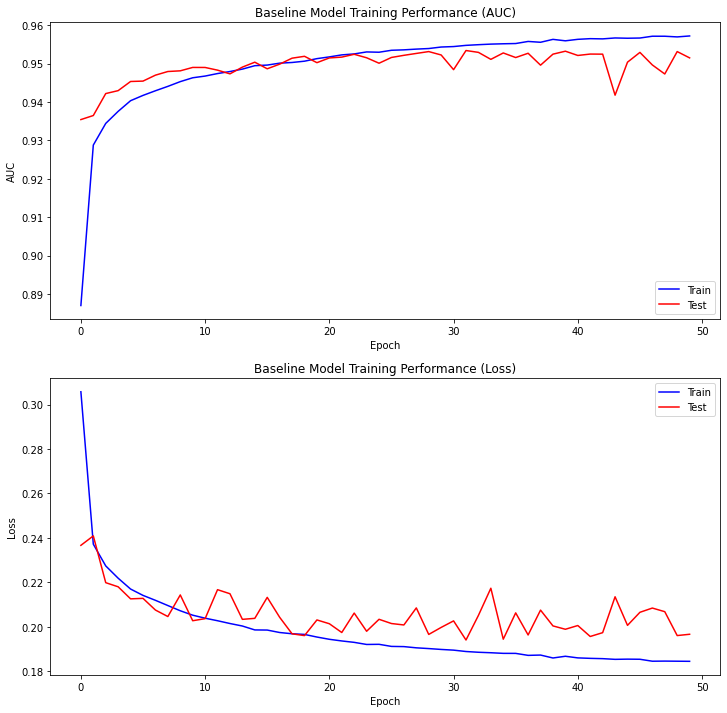

In [34]:
# Summarize model training hisotry
fig, axs = plt.subplots(2, 1, figsize=(12,12))
plt.subplot(211)
plt.plot(training_hist.history['auc'], color='blue', label='train')
plt.plot(training_hist.history['val_auc'], color='red', label='test')
plt.title('Baseline Model Training Performance (AUC)')
plt.ylabel('AUC')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.subplot(212)
plt.plot(training_hist.history['loss'], color='blue', label='train')
plt.plot(training_hist.history['val_loss'], color='red', label='test')
plt.title('Baseline Model Training Performance (Loss)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [0]:
if (notifyStatus): email_notify("Task 3. Define and Fit Model completed! "+datetime.now().strftime('%a %B %d, %Y %I:%M:%S %p'))

# Task 4. Explore Various One-Layer Models

In [0]:
if (notifyStatus): email_notify("Task 4. Explore Various One-Layer Models has begun! "+datetime.now().strftime('%a %B %d, %Y %I:%M:%S %p'))

In [37]:
startTimeModule = datetime.now()

# Define MLP model 4A
def create_model_4A():
    default_model = Sequential()
    default_model.add(Dense(512, input_shape=(X_train.shape[1],), activation='relu', kernel_initializer=default_kernel_init))
    default_model.add(Dense(64, activation='relu', kernel_initializer=default_kernel_init))
    default_model.add(Dense(1, activation='sigmoid', kernel_initializer=default_kernel_init))
    default_model.compile(loss=default_loss, optimizer=default_optimizer, metrics=default_metrics)
    return default_model

# Initialize and fit the model
reset_random(seedNum)
baseline_model_4A = create_model_4A()
print(baseline_model_4A.get_config())
training_hist = baseline_model_4A.fit(X_train, y_train, epochs=default_epoch, batch_size=default_batch, validation_data=(X_test, y_test), verbose=0)
print('The maximum ROC-AUC for the training dataset:', max(training_hist.history['auc']))
print('The ROC-AUC at the last epoch for the training dataset:', training_hist.history['auc'][-1])
print('The maximum ROC-AUC for the test dataset:', max(training_hist.history['val_auc']))
print('The ROC-AUC at the last epoch for the test dataset:', training_hist.history['val_auc'][-1])
print('Total time for model fitting:', (datetime.now() - startTimeModule))

{'name': 'sequential_1', 'layers': [{'class_name': 'Dense', 'config': {'name': 'dense_3', 'trainable': True, 'batch_input_shape': (None, 580), 'dtype': 'float32', 'units': 512, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 2.0, 'mode': 'fan_in', 'distribution': 'uniform', 'seed': 888}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}}, {'class_name': 'Dense', 'config': {'name': 'dense_4', 'trainable': True, 'dtype': 'float32', 'units': 64, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 2.0, 'mode': 'fan_in', 'distribution': 'uniform', 'seed': 888}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constra

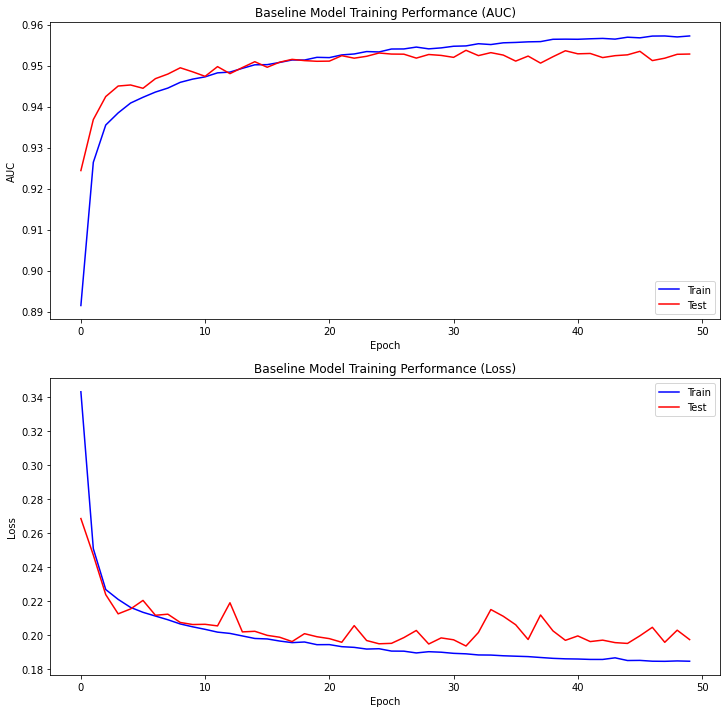

In [38]:
# Summarize model training hisotry
fig, axs = plt.subplots(2, 1, figsize=(12,12))
plt.subplot(211)
plt.plot(training_hist.history['auc'], color='blue', label='train')
plt.plot(training_hist.history['val_auc'], color='red', label='test')
plt.title('Baseline Model Training Performance (AUC)')
plt.ylabel('AUC')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.subplot(212)
plt.plot(training_hist.history['loss'], color='blue', label='train')
plt.plot(training_hist.history['val_loss'], color='red', label='test')
plt.title('Baseline Model Training Performance (Loss)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [39]:
startTimeModule = datetime.now()

# Define MLP model 4B
def create_model_4B():
    default_model = Sequential()
    default_model.add(Dense(512, input_shape=(X_train.shape[1],), activation='relu', kernel_initializer=default_kernel_init))
    default_model.add(Dense(192, activation='relu', kernel_initializer=default_kernel_init))
    default_model.add(Dense(1, activation='sigmoid', kernel_initializer=default_kernel_init))
    default_model.compile(loss=default_loss, optimizer=default_optimizer, metrics=default_metrics)
    return default_model

# Initialize and fit the model
reset_random(seedNum)
baseline_model_4B = create_model_4B()
print(baseline_model_4B.get_config())
training_hist = baseline_model_4B.fit(X_train, y_train, epochs=default_epoch, batch_size=default_batch, validation_data=(X_test, y_test), verbose=0)
print('The maximum ROC-AUC for the training dataset:', max(training_hist.history['auc']))
print('The ROC-AUC at the last epoch for the training dataset:', training_hist.history['auc'][-1])
print('The maximum ROC-AUC for the test dataset:', max(training_hist.history['val_auc']))
print('The ROC-AUC at the last epoch for the test dataset:', training_hist.history['val_auc'][-1])
print('Total time for model fitting:', (datetime.now() - startTimeModule))

{'name': 'sequential_2', 'layers': [{'class_name': 'Dense', 'config': {'name': 'dense_6', 'trainable': True, 'batch_input_shape': (None, 580), 'dtype': 'float32', 'units': 512, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 2.0, 'mode': 'fan_in', 'distribution': 'uniform', 'seed': 888}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}}, {'class_name': 'Dense', 'config': {'name': 'dense_7', 'trainable': True, 'dtype': 'float32', 'units': 192, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 2.0, 'mode': 'fan_in', 'distribution': 'uniform', 'seed': 888}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constr

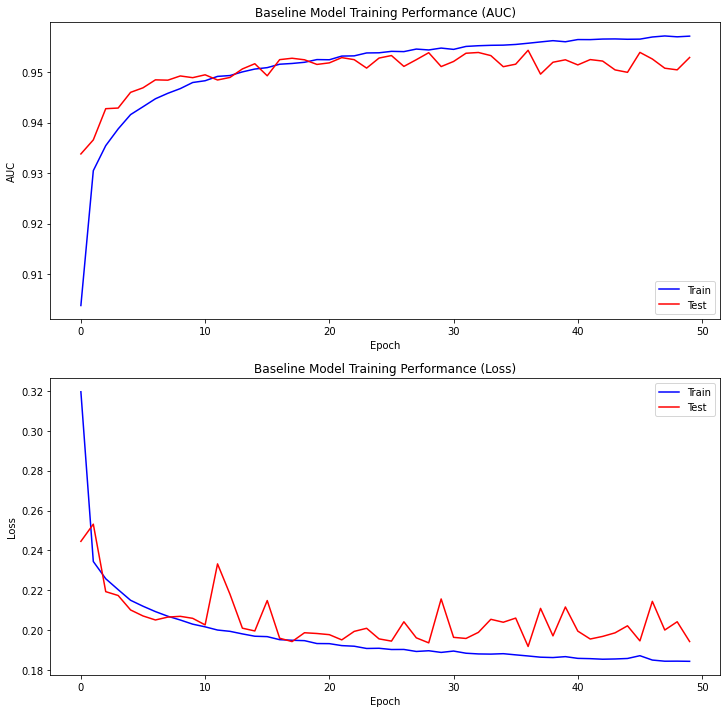

In [40]:
# Summarize model training hisotry
fig, axs = plt.subplots(2, 1, figsize=(12,12))
plt.subplot(211)
plt.plot(training_hist.history['auc'], color='blue', label='train')
plt.plot(training_hist.history['val_auc'], color='red', label='test')
plt.title('Baseline Model Training Performance (AUC)')
plt.ylabel('AUC')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.subplot(212)
plt.plot(training_hist.history['loss'], color='blue', label='train')
plt.plot(training_hist.history['val_loss'], color='red', label='test')
plt.title('Baseline Model Training Performance (Loss)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [41]:
startTimeModule = datetime.now()

# Define MLP model 4C
def create_model_4C():
    default_model = Sequential()
    default_model.add(Dense(512, input_shape=(X_train.shape[1],), activation='relu', kernel_initializer=default_kernel_init))
    default_model.add(Dense(256, activation='relu', kernel_initializer=default_kernel_init))
    default_model.add(Dense(1, activation='sigmoid', kernel_initializer=default_kernel_init))
    default_model.compile(loss=default_loss, optimizer=default_optimizer, metrics=default_metrics)
    return default_model

# Initialize and fit the model
reset_random(seedNum)
baseline_model_4C = create_model_4C()
print(baseline_model_4C.get_config())
training_hist = baseline_model_4C.fit(X_train, y_train, epochs=default_epoch, batch_size=default_batch, validation_data=(X_test, y_test), verbose=0)
print('The maximum ROC-AUC for the training dataset:', max(training_hist.history['auc']))
print('The ROC-AUC at the last epoch for the training dataset:', training_hist.history['auc'][-1])
print('The maximum ROC-AUC for the test dataset:', max(training_hist.history['val_auc']))
print('The ROC-AUC at the last epoch for the test dataset:', training_hist.history['val_auc'][-1])
print('Total time for model fitting:', (datetime.now() - startTimeModule))

{'name': 'sequential_3', 'layers': [{'class_name': 'Dense', 'config': {'name': 'dense_9', 'trainable': True, 'batch_input_shape': (None, 580), 'dtype': 'float32', 'units': 512, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 2.0, 'mode': 'fan_in', 'distribution': 'uniform', 'seed': 888}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}}, {'class_name': 'Dense', 'config': {'name': 'dense_10', 'trainable': True, 'dtype': 'float32', 'units': 256, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 2.0, 'mode': 'fan_in', 'distribution': 'uniform', 'seed': 888}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_const

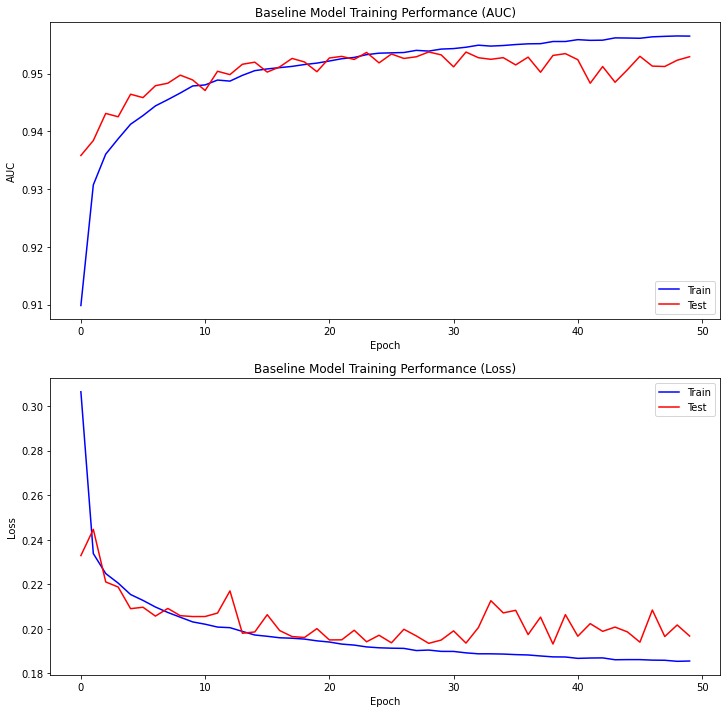

In [42]:
# Summarize model training hisotry
fig, axs = plt.subplots(2, 1, figsize=(12,12))
plt.subplot(211)
plt.plot(training_hist.history['auc'], color='blue', label='train')
plt.plot(training_hist.history['val_auc'], color='red', label='test')
plt.title('Baseline Model Training Performance (AUC)')
plt.ylabel('AUC')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.subplot(212)
plt.plot(training_hist.history['loss'], color='blue', label='train')
plt.plot(training_hist.history['val_loss'], color='red', label='test')
plt.title('Baseline Model Training Performance (Loss)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [43]:
startTimeModule = datetime.now()

# Define MLP model 4D
def create_model_4D():
    default_model = Sequential()
    default_model.add(Dense(512, input_shape=(X_train.shape[1],), activation='relu', kernel_initializer=default_kernel_init))
    default_model.add(Dense(320, activation='relu', kernel_initializer=default_kernel_init))
    default_model.add(Dense(1, activation='sigmoid', kernel_initializer=default_kernel_init))
    default_model.compile(loss=default_loss, optimizer=default_optimizer, metrics=default_metrics)
    return default_model

# Initialize and fit the model
reset_random(seedNum)
baseline_model_4D = create_model_4D()
print(baseline_model_4D.get_config())
training_hist = baseline_model_4D.fit(X_train, y_train, epochs=default_epoch, batch_size=default_batch, validation_data=(X_test, y_test), verbose=0)
print('The maximum ROC-AUC for the training dataset:', max(training_hist.history['auc']))
print('The ROC-AUC at the last epoch for the training dataset:', training_hist.history['auc'][-1])
print('The maximum ROC-AUC for the test dataset:', max(training_hist.history['val_auc']))
print('The ROC-AUC at the last epoch for the test dataset:', training_hist.history['val_auc'][-1])
print('Total time for model fitting:', (datetime.now() - startTimeModule))

{'name': 'sequential_4', 'layers': [{'class_name': 'Dense', 'config': {'name': 'dense_12', 'trainable': True, 'batch_input_shape': (None, 580), 'dtype': 'float32', 'units': 512, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 2.0, 'mode': 'fan_in', 'distribution': 'uniform', 'seed': 888}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}}, {'class_name': 'Dense', 'config': {'name': 'dense_13', 'trainable': True, 'dtype': 'float32', 'units': 320, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 2.0, 'mode': 'fan_in', 'distribution': 'uniform', 'seed': 888}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_cons

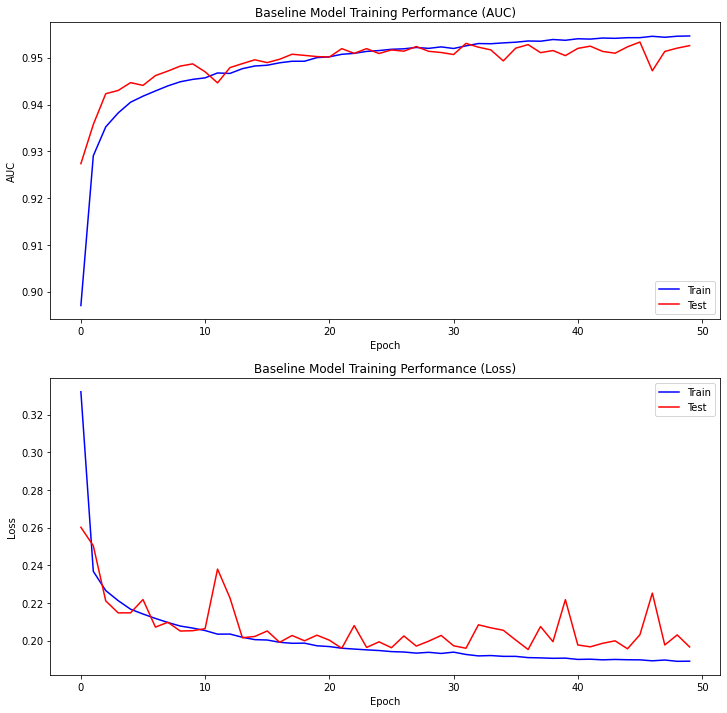

In [44]:
# Summarize model training hisotry
fig, axs = plt.subplots(2, 1, figsize=(12,12))
plt.subplot(211)
plt.plot(training_hist.history['auc'], color='blue', label='train')
plt.plot(training_hist.history['val_auc'], color='red', label='test')
plt.title('Baseline Model Training Performance (AUC)')
plt.ylabel('AUC')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.subplot(212)
plt.plot(training_hist.history['loss'], color='blue', label='train')
plt.plot(training_hist.history['val_loss'], color='red', label='test')
plt.title('Baseline Model Training Performance (Loss)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [45]:
startTimeModule = datetime.now()

# Define MLP model 4E
def create_model_4E():
    default_model = Sequential()
    default_model.add(Dense(512, input_shape=(X_train.shape[1],), activation='relu', kernel_initializer=default_kernel_init))
    default_model.add(Dense(384, activation='relu', kernel_initializer=default_kernel_init))
    default_model.add(Dense(1, activation='sigmoid', kernel_initializer=default_kernel_init))
    default_model.compile(loss=default_loss, optimizer=default_optimizer, metrics=default_metrics)
    return default_model

# Initialize and fit the model
reset_random(seedNum)
baseline_model_4E = create_model_4E()
print(baseline_model_4E.get_config())
training_hist = baseline_model_4E.fit(X_train, y_train, epochs=default_epoch, batch_size=default_batch, validation_data=(X_test, y_test), verbose=0)
print('The maximum ROC-AUC for the training dataset:', max(training_hist.history['auc']))
print('The ROC-AUC at the last epoch for the training dataset:', training_hist.history['auc'][-1])
print('The maximum ROC-AUC for the test dataset:', max(training_hist.history['val_auc']))
print('The ROC-AUC at the last epoch for the test dataset:', training_hist.history['val_auc'][-1])
print('Total time for model fitting:', (datetime.now() - startTimeModule))

{'name': 'sequential_5', 'layers': [{'class_name': 'Dense', 'config': {'name': 'dense_15', 'trainable': True, 'batch_input_shape': (None, 580), 'dtype': 'float32', 'units': 512, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 2.0, 'mode': 'fan_in', 'distribution': 'uniform', 'seed': 888}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}}, {'class_name': 'Dense', 'config': {'name': 'dense_16', 'trainable': True, 'dtype': 'float32', 'units': 384, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 2.0, 'mode': 'fan_in', 'distribution': 'uniform', 'seed': 888}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_cons

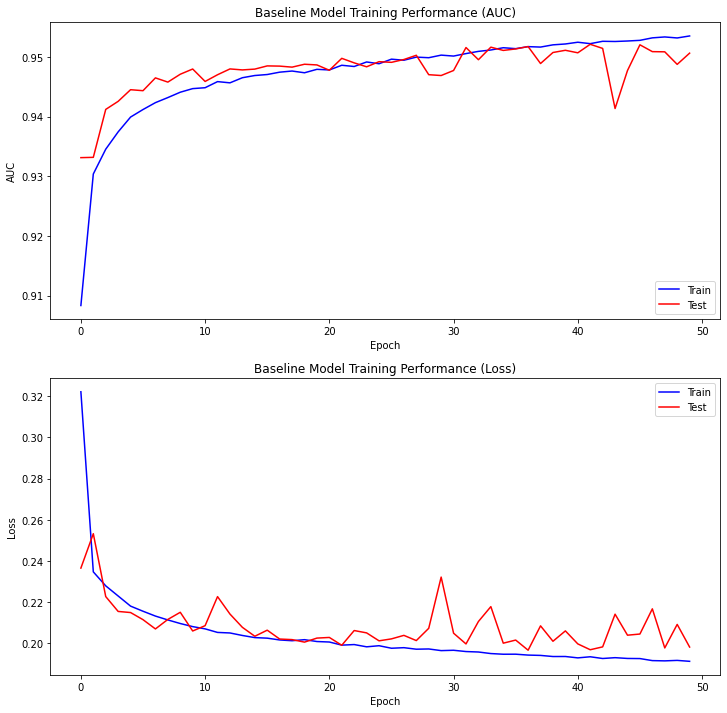

In [46]:
# Summarize model training hisotry
fig, axs = plt.subplots(2, 1, figsize=(12,12))
plt.subplot(211)
plt.plot(training_hist.history['auc'], color='blue', label='train')
plt.plot(training_hist.history['val_auc'], color='red', label='test')
plt.title('Baseline Model Training Performance (AUC)')
plt.ylabel('AUC')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.subplot(212)
plt.plot(training_hist.history['loss'], color='blue', label='train')
plt.plot(training_hist.history['val_loss'], color='red', label='test')
plt.title('Baseline Model Training Performance (Loss)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [47]:
startTimeModule = datetime.now()

# Define MLP model 4F
def create_model_4F():
    default_model = Sequential()
    default_model.add(Dense(512, input_shape=(X_train.shape[1],), activation='relu', kernel_initializer=default_kernel_init))
    default_model.add(Dense(448, activation='relu', kernel_initializer=default_kernel_init))
    default_model.add(Dense(1, activation='sigmoid', kernel_initializer=default_kernel_init))
    default_model.compile(loss=default_loss, optimizer=default_optimizer, metrics=default_metrics)
    return default_model

# Initialize and fit the model
reset_random(seedNum)
baseline_model_4F = create_model_4F()
print(baseline_model_4F.get_config())
training_hist = baseline_model_4F.fit(X_train, y_train, epochs=default_epoch, batch_size=default_batch, validation_data=(X_test, y_test), verbose=0)
print('The maximum ROC-AUC for the training dataset:', max(training_hist.history['auc']))
print('The ROC-AUC at the last epoch for the training dataset:', training_hist.history['auc'][-1])
print('The maximum ROC-AUC for the test dataset:', max(training_hist.history['val_auc']))
print('The ROC-AUC at the last epoch for the test dataset:', training_hist.history['val_auc'][-1])
print('Total time for model fitting:', (datetime.now() - startTimeModule))

{'name': 'sequential_6', 'layers': [{'class_name': 'Dense', 'config': {'name': 'dense_18', 'trainable': True, 'batch_input_shape': (None, 580), 'dtype': 'float32', 'units': 512, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 2.0, 'mode': 'fan_in', 'distribution': 'uniform', 'seed': 888}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}}, {'class_name': 'Dense', 'config': {'name': 'dense_19', 'trainable': True, 'dtype': 'float32', 'units': 448, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 2.0, 'mode': 'fan_in', 'distribution': 'uniform', 'seed': 888}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_cons

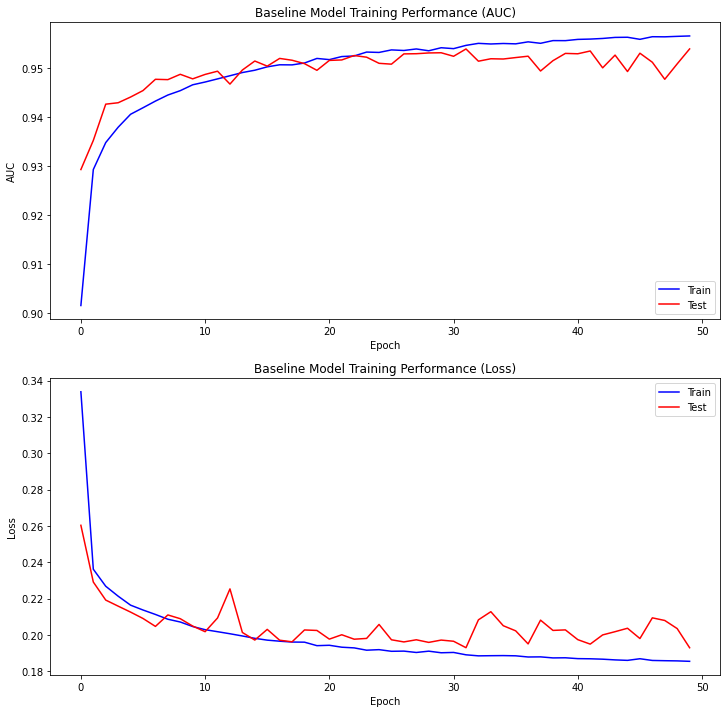

In [48]:
# Summarize model training hisotry
fig, axs = plt.subplots(2, 1, figsize=(12,12))
plt.subplot(211)
plt.plot(training_hist.history['auc'], color='blue', label='train')
plt.plot(training_hist.history['val_auc'], color='red', label='test')
plt.title('Baseline Model Training Performance (AUC)')
plt.ylabel('AUC')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.subplot(212)
plt.plot(training_hist.history['loss'], color='blue', label='train')
plt.plot(training_hist.history['val_loss'], color='red', label='test')
plt.title('Baseline Model Training Performance (Loss)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [0]:
if (notifyStatus): email_notify("Task 4. Explore Various One-Layer Models completed! "+datetime.now().strftime('%a %B %d, %Y %I:%M:%S %p'))

# Task 5. Finalize Model and Make Predictions

In [0]:
if (notifyStatus): email_notify("Task 5. Finalize Model has begun! "+datetime.now().strftime('%a %B %d, %Y %I:%M:%S %p'))

### 5.a) Create a standalone model using all available data

In [51]:
# Combining the training and testing datasets to form the complete dataset that will be used for training the final model
X_complete = np.vstack((X_train, X_test))
y_complete = np.concatenate((y_train, y_test))
print("X_complete.shape: {} y_complete.shape: {}".format(X_complete.shape, y_complete.shape))

X_complete.shape: (260753, 580) y_complete.shape: (260753,)


In [52]:
final_model = create_default_model()
training_hist = final_model.fit(X_complete, y_complete, epochs=default_epoch, batch_size=default_batch, verbose=1)

Epoch 1/50
8149/8149 [==============================] - 21s 3ms/step - loss: 0.2987 - auc: 0.9099
Epoch 2/50
8149/8149 [==============================] - 21s 3ms/step - loss: 0.2314 - auc: 0.9324
Epoch 3/50
8149/8149 [==============================] - 22s 3ms/step - loss: 0.2233 - auc: 0.9372
Epoch 4/50
8149/8149 [==============================] - 21s 3ms/step - loss: 0.2172 - auc: 0.9406
Epoch 5/50
8149/8149 [==============================] - 21s 3ms/step - loss: 0.2134 - auc: 0.9425
Epoch 6/50
8149/8149 [==============================] - 21s 3ms/step - loss: 0.2094 - auc: 0.9447
Epoch 7/50
8149/8149 [==============================] - 21s 3ms/step - loss: 0.2076 - auc: 0.9454
Epoch 8/50
8149/8149 [==============================] - 21s 3ms/step - loss: 0.2051 - auc: 0.9468
Epoch 9/50
8149/8149 [==============================] - 21s 3ms/step - loss: 0.2044 - auc: 0.9471
Epoch 10/50
8149/8149 [==============================] - 21s 3ms/step - loss: 0.2013 - auc: 0.9486
Epoch 11/50
8149/81

In [53]:
# Display a summary of the final model
print(final_model.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 512)               297472    
_________________________________________________________________
dense_22 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 129       
Total params: 363,265
Trainable params: 363,265
Non-trainable params: 0
_________________________________________________________________
None


In [54]:
# Display the configuration of the final model
print(final_model.get_config())

{'name': 'sequential_7', 'layers': [{'class_name': 'Dense', 'config': {'name': 'dense_21', 'trainable': True, 'batch_input_shape': (None, 580), 'dtype': 'float32', 'units': 512, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 2.0, 'mode': 'fan_in', 'distribution': 'uniform', 'seed': 888}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}}, {'class_name': 'Dense', 'config': {'name': 'dense_22', 'trainable': True, 'dtype': 'float32', 'units': 128, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 2.0, 'mode': 'fan_in', 'distribution': 'uniform', 'seed': 888}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_cons

### 5.b) Create Submission Files for Kaggle Evaluation

In [55]:
dataset_path = 'https://dainesanalytics.com/datasets/kaggle-homesite-quote-conversion/test.csv'
X_kaggle_data = pd.read_csv(dataset_path, sep=',')

# Take a peek at the dataframe after import
X_kaggle_data.head(10)

,QuoteNumber,Original_Quote_Date,Field6,Field7,Field8,Field9,Field10,Field11,Field12,CoverageField1A,CoverageField1B,CoverageField2A,CoverageField2B,CoverageField3A,CoverageField3B,CoverageField4A,CoverageField4B,CoverageField5A,CoverageField5B,CoverageField6A,CoverageField6B,CoverageField8,CoverageField9,CoverageField11A,CoverageField11B,SalesField1A,SalesField1B,SalesField2A,SalesField2B,SalesField3,SalesField4,SalesField5,SalesField6,SalesField7,SalesField8,SalesField9,SalesField10,SalesField11,SalesField12,SalesField13,...,GeographicField44A,GeographicField44B,GeographicField45A,GeographicField45B,GeographicField46A,GeographicField46B,GeographicField47A,GeographicField47B,GeographicField48A,GeographicField48B,GeographicField49A,GeographicField49B,GeographicField50A,GeographicField50B,GeographicField51A,GeographicField51B,GeographicField52A,GeographicField52B,GeographicField53A,GeographicField53B,GeographicField54A,GeographicField54B,GeographicField55A,GeographicField55B,GeographicField56A,GeographicField56B,GeographicField57A,GeographicField57B,GeographicField58A,GeographicField58B,GeographicField59A,GeographicField59B,GeographicField60A,GeographicField60B,GeographicField61A,GeographicField61B,GeographicField62A,GeographicField62B,GeographicField63,GeographicField64
0,3,2014-08-12,E,16,0.9364,0.0006,"1,487",1.3045,N,4,4,4,4,3,3,3,4,13,22,13,23,Y,K,13,22,6,16,9,21,0,5,5,11,P,67052,0,0,0,0,0,...,22,23,9,12,25,25,6,9,4,2,16,12,20,20,2,2,2,1,1,1,10,7,25,25,-1,19,19,22,12,15,1,1,-1,1,-1,20,-1,25,Y,IL
1,5,2013-09-07,F,11,0.9919,0.0038,564,1.1886,N,8,14,8,14,7,12,8,13,13,22,13,23,T,E,4,5,3,6,3,6,1,5,5,4,R,27288,1,0,0,0,0,...,23,24,12,21,23,25,7,11,16,14,13,6,17,15,7,5,7,5,13,7,14,14,7,14,-1,4,1,1,5,3,10,10,-1,5,-1,5,-1,21,N,NJ
2,7,2013-03-29,F,15,0.8945,0.0038,564,1.0670,N,11,18,11,18,10,16,10,18,13,22,13,23,T,E,3,3,5,14,3,9,1,5,5,23,V,65264,0,1,2,2,0,...,16,18,9,10,14,16,6,8,20,19,17,14,16,13,20,22,20,22,20,18,10,7,4,7,-1,11,13,12,18,22,10,11,-1,20,-1,22,-1,11,N,NJ
3,9,2015-03-21,K,21,0.8870,0.0004,"1,113",1.2665,Y,14,22,15,22,13,20,22,25,13,22,13,23,Y,F,5,9,9,20,5,16,1,5,5,11,R,32725,1,1,1,1,0,...,11,11,9,10,11,13,15,21,14,12,17,13,10,6,20,22,20,22,19,16,12,11,4,6,-1,13,10,8,5,3,8,8,-1,13,-1,8,-1,21,N,TX
4,10,2014-12-10,B,25,0.9153,0.0007,935,1.0200,N,4,5,4,5,4,4,4,5,13,22,13,23,Y,D,12,21,1,1,3,6,0,5,5,11,T,56025,0,1,1,1,0,...,9,8,25,25,9,3,9,18,7,4,16,12,13,9,8,6,8,6,11,5,19,21,13,21,-1,23,11,8,5,3,7,7,-1,3,-1,22,-1,21,N,CA
5,11,2013-07-19,B,24,0.9403,0.0006,965,1.0200,N,11,18,11,18,10,16,10,18,13,22,13,23,Y,D,6,12,6,17,4,14,0,5,5,24,V,42868,0,0,0,0,0,...,14,14,2,4,10,10,21,23,12,10,17,13,15,12,6,4,6,4,17,12,14,14,11,20,-1,21,10,6,10,12,9,9,-1,2,-1,20,-1,8,N,CA
6,15,2014-07-28,E,23,0.9392,0.0006,"1,487",1.3045,N,5,6,5,6,4,5,4,5,13,22,13,23,Y,K,11,21,3,8,5,15,1,5,5,11,K,52431,0,0,0,0,0,...,8,3,6,6,13,15,4,2,21,21,20,20,15,12,23,24,23,24,20,18,16,16,2,3,-1,3,25,25,9,9,11,12,-1,7,-1,4,-1,8,N,IL
7,16,2015-01-20,B,25,0.9153,0.0007,935,1.0200,N,6,9,6,9,5,7,5,8,13,22,13,23,Y,D,10,19,2,5,3,9,1,5,5,11,P,2572,0,0,0,0,0,...,14,14,2,2,9,3,1,1,18,18,20,19,14,10,23,24,22,24,15,10,22,24,7,14,-1,16,15,16,2,1,15,19,-1,17,-1,15,-1,8,N,CA
8,17,2014-05-28,J,23,0.8928,0.0004,"1,113",1.2665,N,12,20,12,20,11,18,12,19,13,22,13,23,T,F,2,3,15,24,10,22,0,5,5,11,T,10065,0,1,1,1,1,...,8,5,12,21,11,13,8,15,11,8,17,12,19,19,13,12,13,12,17,12,8,5,6,11,-1,15,12,10,4,2,7,7,-1,12,-1,5,-1,8,N,TX
9,21,2013-07-11,J,23,0.9691,0.0004,"1,165",1.2665,N,3,3,3,3,3,3,3,3,13,22,13,23,Y,F,14,23,9,21,15,24,1,3,4,1,Q,8321,0,0,0,0,0,...,10,9,11,18,12,14,8,16,2,1,22,22,23,24,1,1,1,1,14,8,2,1,9,17,-1,13,15,17,19,23,7,6,-1,1,-1,8,-1,13,N,TX


In [56]:
# Set up the dataframe to capture predictions for Kaggle submission
y_submission_kaggle = pd.DataFrame(columns=['QuoteNumber', 'QuoteConversion_Flag'])
y_submission_kaggle['QuoteNumber'] = X_kaggle_data['QuoteNumber']
y_submission_kaggle.head()

,QuoteNumber,QuoteConversion_Flag
0,3,NaN
1,5,NaN
2,7,NaN
3,9,NaN
4,10,NaN


In [57]:
# Check to see whether the test dataset contains any NaN
null_counts = X_kaggle_data.isnull().sum()
null_counts[null_counts > 0]

PersonalField7         69
PersonalField84     82812
PropertyField3         69
PropertyField4         52
PropertyField5          1
PropertyField29    133945
PropertyField30         1
PropertyField32        41
PropertyField34        41
PropertyField36        67
PropertyField38       846
dtype: int64

In [58]:
print('Total number of NaN in the dataframe: ', X_kaggle_data.isnull().sum().sum())

Total number of NaN in the dataframe:  217944


In [59]:
# Apply the same data pre-processing steps to the test data
X_kaggle_data.drop(columns=['QuoteNumber','Original_Quote_Date'], inplace=True)
X_kaggle_data.drop(columns=['PersonalField84','PropertyField29'], inplace=True)
X_kaggle_data.drop(columns=['SalesField8'], inplace=True)

# Impute missing attributes with the "majority" value for each attribute
X_kaggle_data['PersonalField7'].fillna('N', inplace=True)
X_kaggle_data['PropertyField3'].fillna('N', inplace=True)
X_kaggle_data['PropertyField4'].fillna('N', inplace=True)
X_kaggle_data['PropertyField5'].fillna('Y', inplace=True)
X_kaggle_data['PropertyField30'].fillna('N', inplace=True)
X_kaggle_data['PropertyField32'].fillna('Y', inplace=True)
X_kaggle_data['PropertyField34'].fillna('Y', inplace=True)
X_kaggle_data['PropertyField36'].fillna('N', inplace=True)
X_kaggle_data['PropertyField38'].fillna('N', inplace=True)

# Correct non-ASCII characters in some attribute columns
X_kaggle_data['PropertyField37'] = X_kaggle_data['PropertyField37'].apply(lambda x: ''.join(["N" if ord(i) < 65 or ord(i) > 90 else i for i in x]))
X_kaggle_data['GeographicField63'] = X_kaggle_data['GeographicField63'].apply(lambda x: ''.join(["N" if ord(i) < 65 or ord(i) > 90 else i for i in x]))

# Correct mis-coding for some features
X_kaggle_data.loc[(X_kaggle_data.PersonalField16 == 'XG'), 'PersonalField16'] = 'OTHER'
X_kaggle_data.loc[(X_kaggle_data.PersonalField16 == 'YG'), 'PersonalField16'] = 'OTHER'
X_kaggle_data.loc[(X_kaggle_data.PersonalField16 == 'ZM'), 'PersonalField16'] = 'OTHER'
X_kaggle_data.loc[(X_kaggle_data.PersonalField17 == 'XF'), 'PersonalField17'] = 'OTHER'
X_kaggle_data.loc[(X_kaggle_data.PersonalField17 == 'XZ'), 'PersonalField17'] = 'OTHER'
X_kaggle_data.loc[(X_kaggle_data.PersonalField17 == 'YO'), 'PersonalField17'] = 'OTHER'
X_kaggle_data.loc[(X_kaggle_data.PersonalField17 == 'ZJ'), 'PersonalField17'] = 'OTHER'
X_kaggle_data.loc[(X_kaggle_data.PersonalField18 == 'XB'), 'PersonalField18'] = 'OTHER'
X_kaggle_data.loc[(X_kaggle_data.PersonalField19 == 'ZS'), 'PersonalField19'] = 'OTHER'
X_kaggle_data.loc[(X_kaggle_data.PropertyField7 == 'T'), 'PropertyField7'] = 'OTHER'

# Convert columns from one data type to another
X_kaggle_data['Field6'] = X_kaggle_data['Field6'].astype('category')
X_kaggle_data['Field10'] = X_kaggle_data['Field10'].str.replace(',','')
X_kaggle_data['Field10'] = X_kaggle_data['Field10'].astype('int')
X_kaggle_data['Field12'] = X_kaggle_data['Field12'].astype('category')
X_kaggle_data['CoverageField8'] = X_kaggle_data['CoverageField8'].astype('category')
X_kaggle_data['CoverageField9'] = X_kaggle_data['CoverageField9'].astype('category')
X_kaggle_data['SalesField7'] = X_kaggle_data['SalesField7'].astype('category')
X_kaggle_data['PersonalField7'] = X_kaggle_data['PersonalField7'].astype('category')
X_kaggle_data['PersonalField16'] = X_kaggle_data['PersonalField16'].astype('category')
X_kaggle_data['PersonalField17'] = X_kaggle_data['PersonalField17'].astype('category')
X_kaggle_data['PersonalField18'] = X_kaggle_data['PersonalField18'].astype('category')
X_kaggle_data['PersonalField19'] = X_kaggle_data['PersonalField19'].astype('category')
X_kaggle_data['PropertyField3'] = X_kaggle_data['PropertyField3'].astype('category')
X_kaggle_data['PropertyField4'] = X_kaggle_data['PropertyField4'].astype('category')
X_kaggle_data['PropertyField5'] = X_kaggle_data['PropertyField5'].astype('category')
X_kaggle_data['PropertyField7'] = X_kaggle_data['PropertyField7'].astype('category')
X_kaggle_data['PropertyField14'] = X_kaggle_data['PropertyField14'].astype('category')
X_kaggle_data['PropertyField28'] = X_kaggle_data['PropertyField28'].astype('category')
X_kaggle_data['PropertyField30'] = X_kaggle_data['PropertyField30'].astype('category')
X_kaggle_data['PropertyField31'] = X_kaggle_data['PropertyField31'].astype('category')
X_kaggle_data['PropertyField32'] = X_kaggle_data['PropertyField32'].astype('category')
X_kaggle_data['PropertyField33'] = X_kaggle_data['PropertyField33'].astype('category')
X_kaggle_data['PropertyField34'] = X_kaggle_data['PropertyField34'].astype('category')
X_kaggle_data['PropertyField36'] = X_kaggle_data['PropertyField36'].astype('category')
X_kaggle_data['PropertyField37'] = X_kaggle_data['PropertyField37'].astype('category')
X_kaggle_data['PropertyField38'] = X_kaggle_data['PropertyField38'].astype('category')
X_kaggle_data['GeographicField63'] = X_kaggle_data['GeographicField63'].astype('category')
X_kaggle_data['GeographicField64'] = X_kaggle_data['GeographicField64'].astype('category')

X_kaggle_data[columns_to_scale] = scaler.fit_transform(X_kaggle_data[columns_to_scale])

X_kaggle_data.head(10)

,Field6,Field7,Field8,Field9,Field10,Field11,Field12,CoverageField1A,CoverageField1B,CoverageField2A,CoverageField2B,CoverageField3A,CoverageField3B,CoverageField4A,CoverageField4B,CoverageField5A,CoverageField5B,CoverageField6A,CoverageField6B,CoverageField8,CoverageField9,CoverageField11A,CoverageField11B,SalesField1A,SalesField1B,SalesField2A,SalesField2B,SalesField3,SalesField4,SalesField5,SalesField6,SalesField7,SalesField9,SalesField10,SalesField11,SalesField12,SalesField13,SalesField14,SalesField15,PersonalField1,...,GeographicField44A,GeographicField44B,GeographicField45A,GeographicField45B,GeographicField46A,GeographicField46B,GeographicField47A,GeographicField47B,GeographicField48A,GeographicField48B,GeographicField49A,GeographicField49B,GeographicField50A,GeographicField50B,GeographicField51A,GeographicField51B,GeographicField52A,GeographicField52B,GeographicField53A,GeographicField53B,GeographicField54A,GeographicField54B,GeographicField55A,GeographicField55B,GeographicField56A,GeographicField56B,GeographicField57A,GeographicField57B,GeographicField58A,GeographicField58B,GeographicField59A,GeographicField59B,GeographicField60A,GeographicField60B,GeographicField61A,GeographicField61B,GeographicField62A,GeographicField62B,GeographicField63,GeographicField64
0,E,16,0.456089,0.055556,1.000000,1.000000,N,4,4,4,4,3,3,3,4,13,22,13,23,Y,K,13,22,6,16,9,21,0,5,5,11,P,0,0,0,0,0,0,0,1,...,22,23,9,12,25,25,6,9,4,2,16,12,20,20,2,2,2,1,1,1,10,7,25,25,-1,19,19,22,12,15,1,1,-1,1,-1,20,-1,25,Y,IL
1,F,11,0.865683,0.944444,0.017039,0.619376,N,8,14,8,14,7,12,8,13,13,22,13,23,T,E,4,5,3,6,3,6,1,5,5,4,R,1,0,0,0,0,0,0,1,...,23,24,12,21,23,25,7,11,16,14,13,6,17,15,7,5,7,5,13,7,14,14,7,14,-1,4,1,1,5,3,10,10,-1,5,-1,5,-1,21,N,NJ
2,F,15,0.146863,0.944444,0.017039,0.220033,N,11,18,11,18,10,16,10,18,13,22,13,23,T,E,3,3,5,14,3,9,1,5,5,23,V,0,1,2,2,0,0,0,1,...,16,18,9,10,14,16,6,8,20,19,17,14,16,13,20,22,20,22,20,18,10,7,4,7,-1,11,13,12,18,22,10,11,-1,20,-1,22,-1,11,N,NJ
3,K,21,0.091513,0.000000,0.601704,0.875205,Y,14,22,15,22,13,20,22,25,13,22,13,23,Y,F,5,9,9,20,5,16,1,5,5,11,R,1,1,1,1,0,0,0,1,...,11,11,9,10,11,13,15,21,14,12,17,13,10,6,20,22,20,22,19,16,12,11,4,6,-1,13,10,8,5,3,8,8,-1,13,-1,8,-1,21,N,TX
4,B,25,0.300369,0.083333,0.412141,0.065681,N,4,5,4,5,4,4,4,5,13,22,13,23,Y,D,12,21,1,1,3,6,0,5,5,11,T,0,1,1,1,0,0,0,1,...,9,8,25,25,9,3,9,18,7,4,16,12,13,9,8,6,8,6,11,5,19,21,13,21,-1,23,11,8,5,3,7,7,-1,3,-1,22,-1,21,N,CA
5,B,24,0.484871,0.055556,0.444089,0.065681,N,11,18,11,18,10,16,10,18,13,22,13,23,Y,D,6,12,6,17,4,14,0,5,5,24,V,0,0,0,0,0,0,0,1,...,14,14,2,4,10,10,21,23,12,10,17,13,15,12,6,4,6,4,17,12,14,14,11,20,-1,21,10,6,10,12,9,9,-1,2,-1,20,-1,8,N,CA
6,E,23,0.476753,0.055556,1.000000,1.000000,N,5,6,5,6,4,5,4,5,13,22,13,23,Y,K,11,21,3,8,5,15,1,5,5,11,K,0,0,0,0,0,0,0,1,...,8,3,6,6,13,15,4,2,21,21,20,20,15,12,23,24,23,24,20,18,16,16,2,3,-1,3,25,25,9,9,11,12,-1,7,-1,4,-1,8,N,IL
7,B,25,0.300369,0.083333,0.412141,0.065681,N,6,9,6,9,5,7,5,8,13,22,13,23,Y,D,10,19,2,5,3,9,1,5,5,11,P,0,0,0,0,0,0,0,1,...,14,14,2,2,9,3,1,1,18,18,20,19,14,10,23,24,22,24,15,10,22,24,7,14,-1,16,15,16,2,1,15,19,-1,17,-1,15,-1,8,N,CA
8,J,23,0.134317,0.000000,0.601704,0.875205,N,12,20,12,20,11,18,12,19,13,22,13,23,T,F,2,3,15,24,10,22,0,5,5,11,T,0,1,1,1,1,1,1,0,...,8,5,12,21,11,13,8,15,11,8,17,12,19,19,13,12,13,12,17,12,8,5,6,11,-1,15,12,10,4,2,7,7,-1,12,-1,5,-1,8,N,TX
9,J,23,0.697417,0.000000,0.657082,0.875205,N,3,3,3,3,3,3,3,3,13,22,13,23,Y,F,14,23,9,21,15,24,1,3,4,1,Q,0,0,0,0,0,0,0,1,...,10,9,11,18,12,14,8,16,2,1,22,22,23,24,1,1,1,1,14,8,2,1,9,17,-1,13,15,17,19,23,7,6,-1,1,-1,8,-1,13,N,TX


In [60]:
# Check to see whether the test dataset contains any NaN
null_counts = X_kaggle_data.isnull().sum()
null_counts[null_counts > 0]

Series([], dtype: int64)

In [61]:
print('Total number of NaN in the dataframe: ', X_kaggle_data.isnull().sum().sum())

Total number of NaN in the dataframe:  0


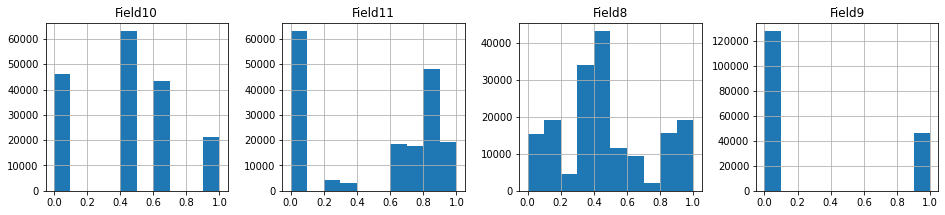

In [62]:
# Perform the same pre-processing of the numeric attributes
X_kaggle_data[columns_to_scale] = scaler.fit_transform(X_kaggle_data[columns_to_scale])
X_kaggle_data[columns_to_scale].hist(layout=(dispRow,dispCol))
plt.show()

In [63]:
# Test the Kaggle dataframe to ensure it has the indentical set of columns with X_original
X_kaggle_data = pd.get_dummies(X_kaggle_data)
X_kaggle_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173836 entries, 0 to 173835
Data columns (total 580 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Field7                 int64  
 1   Field8                 float64
 2   Field9                 float64
 3   Field10                float64
 4   Field11                float64
 5   CoverageField1A        int64  
 6   CoverageField1B        int64  
 7   CoverageField2A        int64  
 8   CoverageField2B        int64  
 9   CoverageField3A        int64  
 10  CoverageField3B        int64  
 11  CoverageField4A        int64  
 12  CoverageField4B        int64  
 13  CoverageField5A        int64  
 14  CoverageField5B        int64  
 15  CoverageField6A        int64  
 16  CoverageField6B        int64  
 17  CoverageField11A       int64  
 18  CoverageField11B       int64  
 19  SalesField1A           int64  
 20  SalesField1B           int64  
 21  SalesField2A           int64  
 22  SalesField2B       

In [64]:
columns_original = X_original.columns.tolist()
columns_kaggle = X_kaggle_data.columns.tolist()
print('Attributes in the training data frame but not in the Kaggle test data frame:')
set(columns_original).difference(set(columns_kaggle))

Attributes in the training data frame but not in the Kaggle test data frame:


set()

In [65]:
print('Attributes in the Kaggle test data frame but not in the training data frame:')
set(columns_kaggle).difference(set(columns_original))

Attributes in the Kaggle test data frame but not in the training data frame:


set()

In [66]:
# Convert the dataframe to numpy array before the final prediction step
X_test_kaggle = X_kaggle_data.to_numpy()
print("X_test_kaggle.shape: {}".format(X_test_kaggle.shape))

X_test_kaggle.shape: (173836, 580)


In [67]:
predictions_kaggle = final_model.predict(X_test_kaggle)
y_submission_kaggle['QuoteConversion_Flag'] = predictions_kaggle
print("y_submission_kaggle.shape: {}".format(y_submission_kaggle.shape))

y_submission_kaggle.shape: (173836, 2)


In [68]:
y_submission_kaggle.head()

,QuoteNumber,QuoteConversion_Flag
0,3,0.021411
1,5,0.044964
2,7,0.027788
3,9,0.007636
4,10,0.323979


In [69]:
submission_file = y_submission_kaggle.to_csv(header=True, index=False)
filename = gdrivePrefix + 'submission_' + datetime.now().strftime('%Y%m%d-%H%M') + '.csv'
with open(filename, 'w') as f:
    f.write(submission_file)
    print('Completed writing output file: ' + filename)

Completed writing output file: /content/gdrive/My Drive/Colab_Downloads/submission_20200516-1703.csv


In [0]:
if (notifyStatus): email_notify("Phase 5 Finalize Model completed! "+datetime.now().strftime('%a %B %d, %Y %I:%M:%S %p'))

In [71]:
print ('Total time for the script:',(datetime.now() - startTimeScript))

Total time for the script: 1:51:47.126152
